In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate random data
m = 1000  # Number of samples
n = 5     # Number of features

# Random feature matrix (X)
X = np.random.rand(m, n)

# True coefficients (θ)
true_theta = np.array([3, -2, 0, 1.5, -1])

# Linear relationship with noise
noise = np.random.randn(m) * 0.5
y = X @ true_theta + noise  # y = Xθ + noise

                x1           x2           x3           x4           x5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.496372     0.500085     0.489858     0.497802     0.500044   
std       0.290317     0.297097     0.285003     0.287006     0.289057   
min       0.000227     0.000031     0.000012     0.000943     0.000135   
25%       0.249803     0.233539     0.237326     0.257741     0.241764   
50%       0.485076     0.508614     0.500180     0.493386     0.511011   
75%       0.752478     0.761016     0.731520     0.745849     0.738501   
max       0.996158     0.999718     0.998893     0.996334     0.999558   

                 y  
count  1000.000000  
mean      0.709679  
std       1.301929  
min      -2.727673  
25%      -0.191753  
50%       0.701682  
75%       1.614184  
max       4.720709  
          x1        x2        x3        x4        x5         y
x1  1.000000 -0.025835 -0.022969 -0.027910 -0.011864  0.691793
x2 -0.025835  1.00

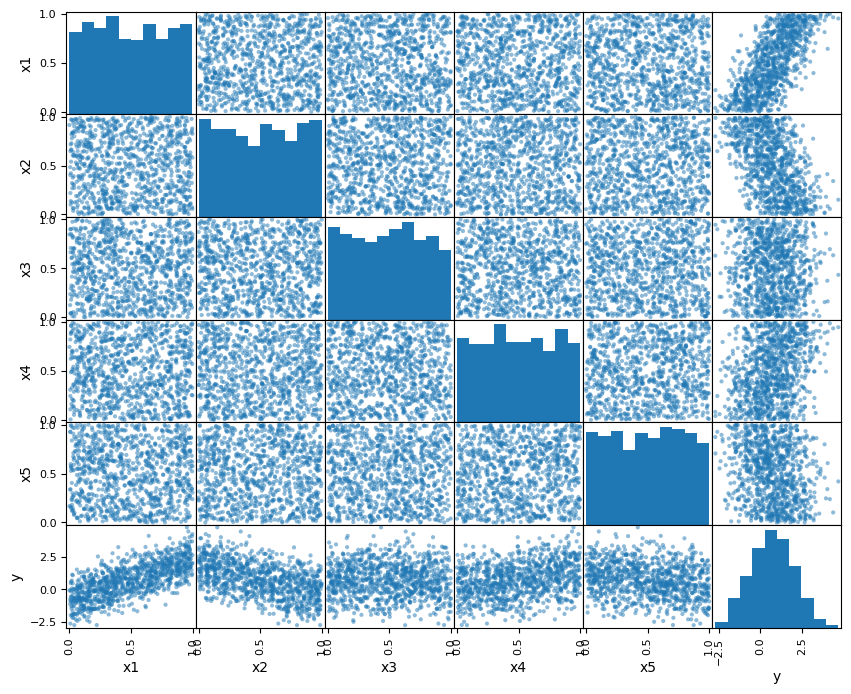

In [3]:
# Convert to DataFrame for easier analysis
df = pd.DataFrame(X, columns=[f"x{i+1}" for i in range(n)])
df["y"] = y

# Summary statistics
print(df.describe())

# Correlation matrix
print(df.corr())

# Visualize relationships
pd.plotting.scatter_matrix(df, figsize=(10, 8))
plt.show()

In [4]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use the same scaler for test data

In [5]:
# Initialize θ with random values
np.random.seed(42)
theta = np.random.randn(n)

# Hyperparameters
learning_rate = 0.01
epochs = 1000

Epoch 0, Loss: 1.4377469178254285
Epoch 100, Loss: 0.5109499096948398
Epoch 200, Loss: 0.38910262681860985
Epoch 300, Loss: 0.3728935142767783
Epoch 400, Loss: 0.3707110335876817
Epoch 500, Loss: 0.37041358364919363
Epoch 600, Loss: 0.3703725575681965
Epoch 700, Loss: 0.3703668336667145
Epoch 800, Loss: 0.3703660263901707
Epoch 900, Loss: 0.37036591139132896


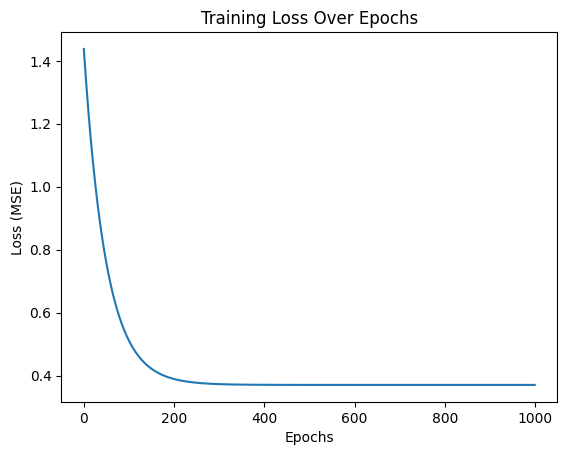

In [6]:
# Gradient Descent
m_train = len(X_train)  # Number of training samples
loss_history = []

for epoch in range(epochs):
    # Forward Pass: Compute predictions
    y_pred = X_train @ theta

    # Compute Loss (MSE)
    loss = (1 / (2 * m_train)) * np.sum((y_pred - y_train) ** 2)
    loss_history.append(loss)

    # Backward Pass: Compute gradients
    gradients = (1 / m_train) * X_train.T @ (y_pred - y_train)

    # Update θ
    theta -= learning_rate * gradients

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Plot loss history
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Over Epochs")
plt.show()

Test MSE: 0.8534642631883617
Test R²: 0.3927399010795407


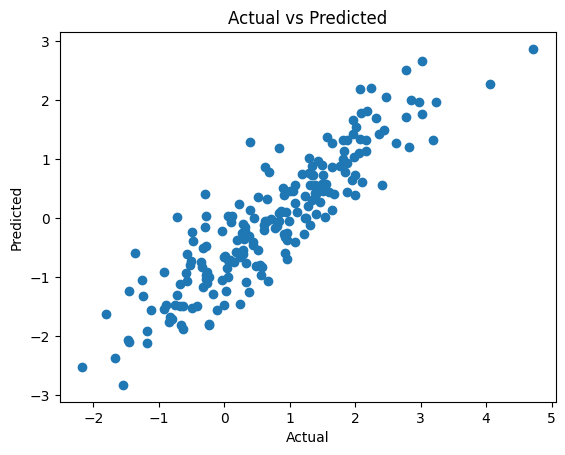

In [7]:
# Predict on test set
y_test_pred = X_test @ theta

# Metrics
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE: {mse}")
print(f"Test R²: {r2}")

# Visualize predictions vs actual
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [8]:
# Ridge Regularization (L2)
lambda_ = 0.1
for epoch in range(epochs):
    y_pred = X_train @ theta
    loss = (1 / (2 * m_train)) * np.sum((y_pred - y_train) ** 2) + (lambda_ / 2) * np.sum(theta ** 2)
    gradients = (1 / m_train) * X_train.T @ (y_pred - y_train) + (lambda_ / m_train) * theta
    theta -= learning_rate * gradients

In [9]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {"alpha": [0.01, 0.1, 1, 10]}

# Grid search with Ridge regression
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best alpha: {grid_search.best_params_}")

Best alpha: {'alpha': 1}
